## Logistic Regression

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

## Binary Logistic Regression

In [2]:
df = pd.read_csv('datasets/insurance_single.csv')
df.sample(5)

,age,bought_insurance
1,25,0
6,55,0
16,25,1
24,50,1
20,21,0


In [3]:
df.shape

(27, 2)

In [4]:
df.describe()

,age,bought_insurance
count,27.000000,27.000000
mean,39.666667,0.518519
std,15.745573,0.509175
min,18.000000,0.000000
25%,25.000000,0.000000
50%,45.000000,1.000000
75%,54.500000,1.000000
max,62.000000,1.000000


## Data Exploration & Visualization

In [5]:
df.corr()

,age,bought_insurance
age,1.000000,0.732395
bought_insurance,0.732395,1.000000


<AxesSubplot:>

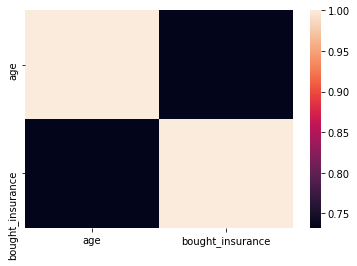

In [6]:
sns.heatmap(df.corr())

Text(0, 0.5, 'bought_insurance')

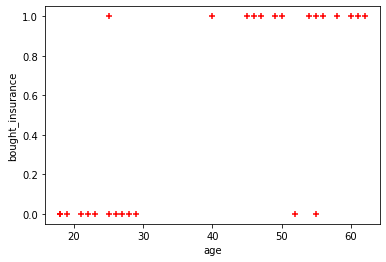

In [7]:
plt.scatter('age', 'bought_insurance', marker='+', color='r', data=df)
plt.xlabel('age')
plt.ylabel('bought_insurance')

## Data Preprocessing and model creation

In [8]:
X = df[['age']]
y = df.bought_insurance

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [10]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [11]:
# Score on train set
model.score(X_train, y_train)

0.9047619047619048

In [12]:
# Score on test set
model.score(X_test, y_test)

0.8333333333333334

In [13]:
model.predict([X_test.iloc[0]])

array([0], dtype=int64)

In [14]:
y_test.iloc[0]

0

In [15]:
y_pred = model.predict(X_test)

In [16]:
print(classification_report(y_test, y_pred))

precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.75      1.00      0.86         3

    accuracy                           0.83         6
   macro avg       0.88      0.83      0.83         6
weighted avg       0.88      0.83      0.83         6



In [17]:
def print_cm(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True)
    plt.xlabel('Predicted')
    plt.ylabel('Truth')

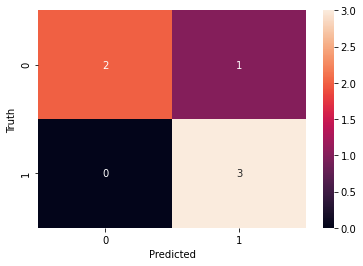

In [18]:
print_cm(y_test, y_pred)